<a href="https://colab.research.google.com/github/Ajay07pandey/Retail-sale-prediction-of-a-drug-store./blob/main/Retail_sale_pridiction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail sale pridiction of a drug store**



##### **Project Type**    - **Regression**
##### **Contribution**    - **Team**
##### **Team Member 1 - Shahrukh ahmed**
##### **Team Member 2 - Prasad Wagh** 
##### **Team Member 3 - Manjiri** 
##### **Team Member 4 - Ashi**
##### **Team Member 5 - Ajay pandey**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently,
Rossmann store managers are tasked with predicting their daily sales for up
to six weeks in advance. Store sales are influenced by many factors, including
promotions, competition, school and state holidays, seasonality, and locality.
With thousands of individual managers predicting sales based on their unique
circumstances, the accuracy of results can be quite varied. You are provided
with historical sales data for 1,115 Rossmann stores. The task is to forecast the
"Sales" column for the test set. Note that some stores in the dataset were
temporarily closed for refurbishmen.**

# **Data fields** 


### **Rossmann Stores Data.csv** - historical data including Sales
### **store.csv**  - supplemental information about the stores

### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### **Id** - an Id that represents a store.
* #### **Store** - a unique Id for each store
* #### **Sales** - the turnover for any given day (this is what we are predicting)
* #### **Customers** - the number of customers on a given day
* #### **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* #### **StateHoliday** - indicates a state holiday. here we have given the dataset of europe so holidays are a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### **SchoolHoliday** - indicates the school holiday. 0 = no holiday, 1 = holiday
* #### **StoreType** - differentiates between 4 different store models: a , b, c, d (By the level of 
* #### **Assortment** - describes an assortment level: **a = basic, b = extra, c = extended**
* #### **CompetitionDistance** - distance in meters to the nearest competitor store
* #### **CompetitionOpendurationSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
* #### **Promo** - indicates whether a store is running a promo on that day
* #### **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
* #### **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries for visualisation 
import numpy as np
from numpy import math 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#importing basic library for pridiction 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading Rossman dataset
rm_df = pd.read_csv('/content/drive/MyDrive/Capstone project/Retail sales prediction (ML)/Rossmann Stores Data.csv')

In [ ]:
# loading Store dataset
store_df = pd.read_csv('/content/drive/MyDrive/Capstone project/Retail sales prediction (ML)/store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
rm_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Rossmann Dataset Rows & Columns count
rm_df.shape

(1017209, 9)

In [ ]:
#store rows and column count
store_df.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
rm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Describe Rossman data set
rm_df.describe(include = 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
# describe storedata set 
store_df.describe(include = 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


#### Duplicate Values

In [ ]:
store_df.duplicated().any()

False

In [ ]:
# Dataset Duplicate Value Count
rm_df.duplicated().sum()

0

In [ ]:
rm_df.duplicated().any()

False

In [ ]:
# Store duplicate values count
store_df.duplicated().sum()

0

Great!!! we don't have duplicate values in our data set

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
store_df.isnull().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [ ]:
rm_df.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [ ]:
rm_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
null = store_df.isnull().sum() 
null

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

## Visualization of nan values

We do visualization of missing values with the help of **Missingno library** which is specially designed for Nan values.

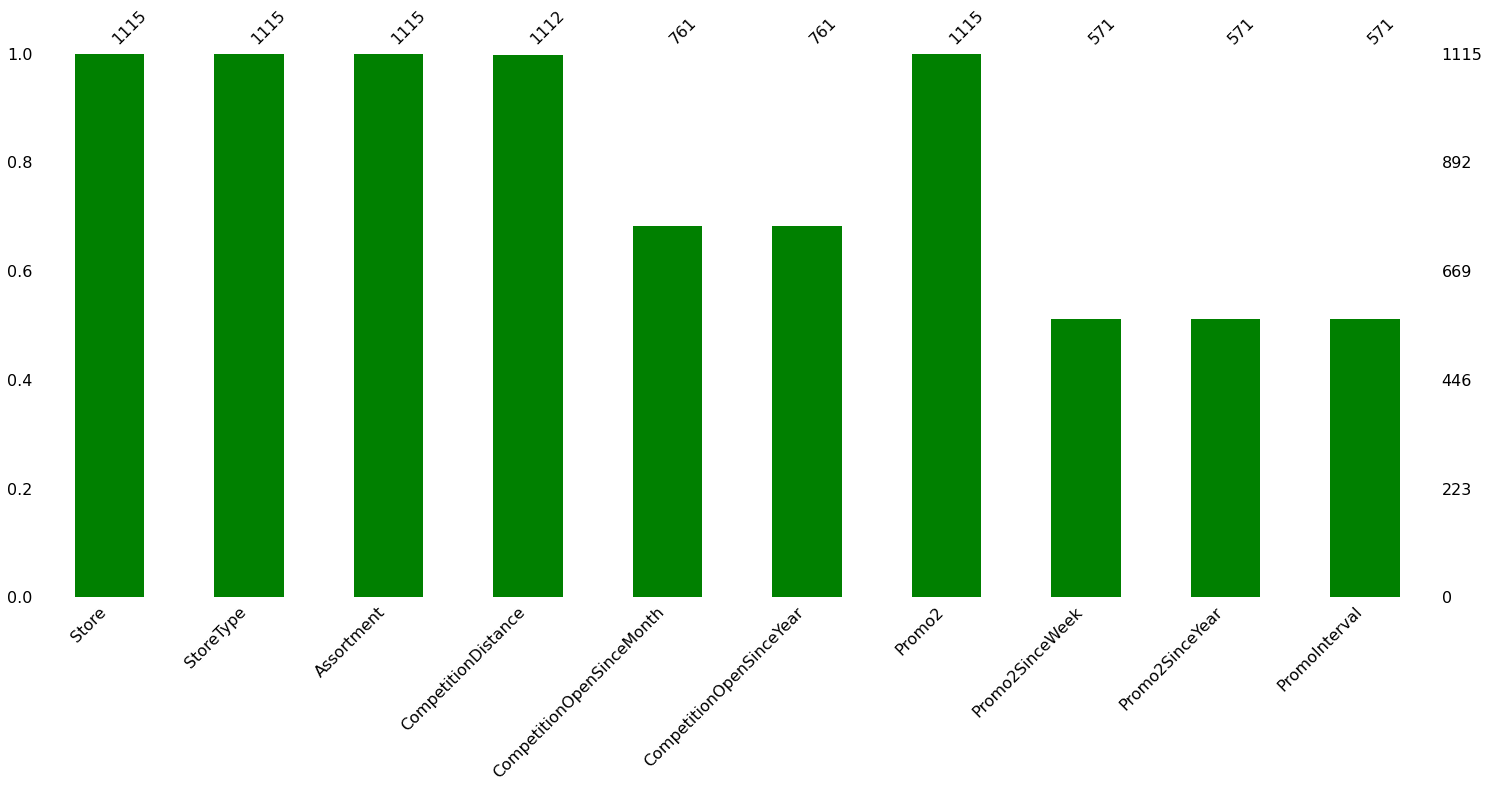

In [ ]:
# Visualization of missing values with the help of Bar plot
plt.figure(figsize=(15,8))
import missingno as msno
msno.bar(store_df, color='green')

For more clear understanding now we draw **Heat Map**

<Figure size 1080x576 with 0 Axes>

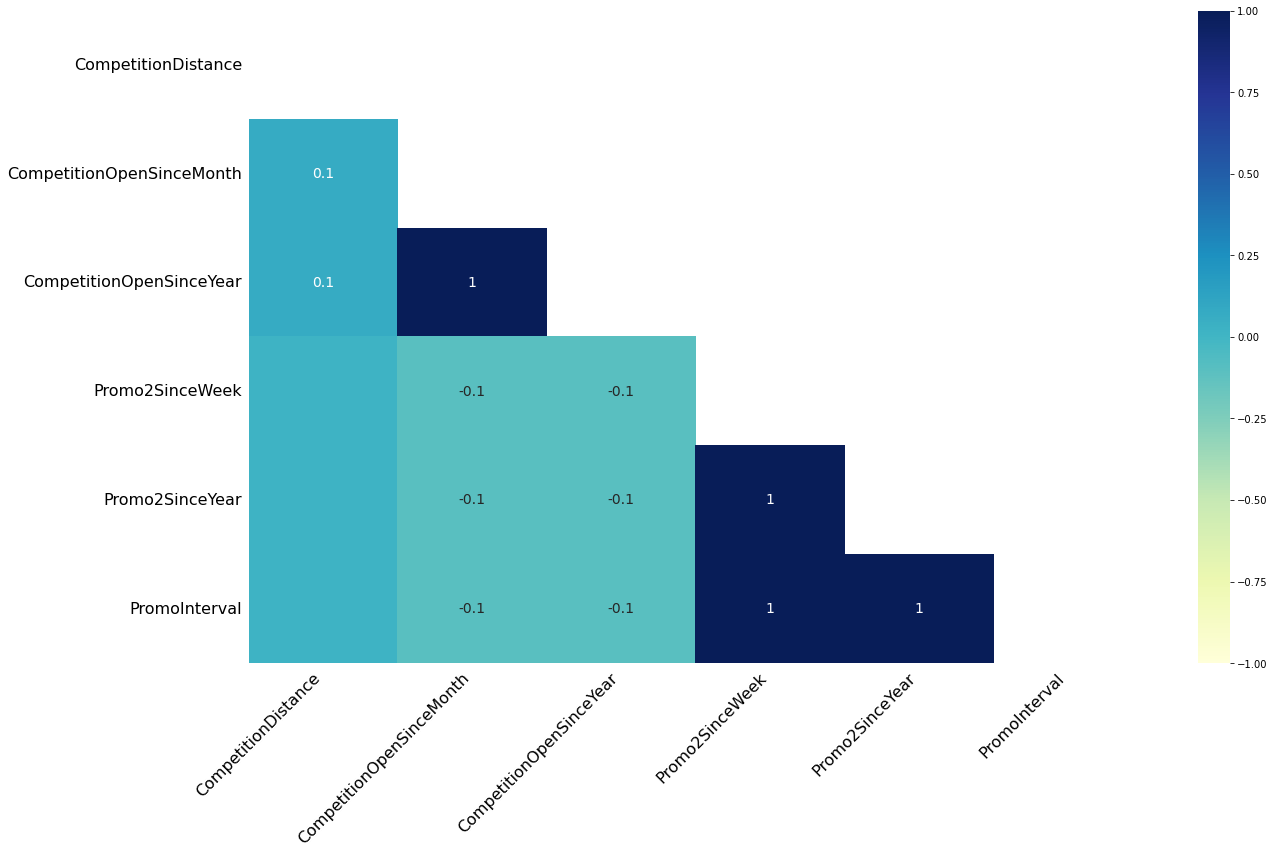

In [ ]:
plt.figure(figsize=(15,8))
msno.heatmap(store_df, cmap='YlGnBu')

In [ ]:
## Now checking Nan values are present or not.
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Now we dont nave Nan values so we can proceed 

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
rm_df.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Columns in store data frame
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
rm_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# store data set 
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
from scipy.stats.morestats import unique
# checking for unique values in Rosseman data set.
list_of_variables = rm_df.columns.to_list()

# Lets create a function to check unique values.
for i in list_of_variables :
  print('The unique values in the', i , 'are' , rm_df[i].unique())


The unique values in the Store are [   1    2    3 ... 1113 1114 1115]
The unique values in the DayOfWeek are [5 4 3 2 1 7 6]
The unique values in the Date are ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05

In [ ]:
variables = store_df.columns.to_list()

# Lets create a function to check unique values.
for i in variables :
  print('The unique values in the', i , 'are' , store_df[i].unique())

The unique values in the Store are [   1    2    3 ... 1113 1114 1115]
The unique values in the StoreType are ['c' 'a' 'd' 'b']
The unique values in the Assortment are ['a' 'c' 'b']
The unique values in the CompetitionDistance are [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+0

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

Text(0.5, 1.0, 'Distribution plot')

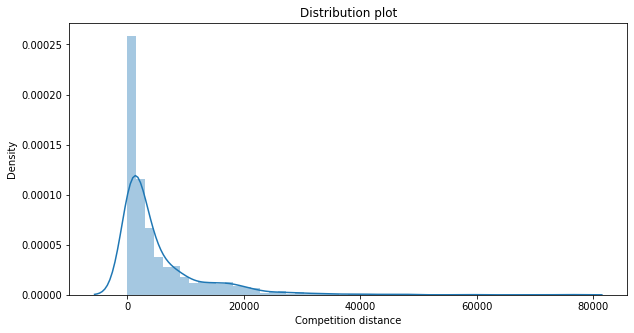

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(x=store_df['CompetitionDistance'])
plt.xlabel('Competition distance')
plt.title('Distribution plot')

Here we can see that the distribution is right skewed so we can take the median value to replace null values of competition distance.

In [ ]:
# code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

Text(0.5, 0, 'Competion open since month')

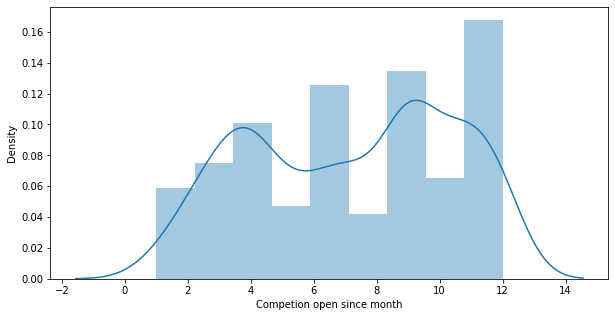

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.distplot(x=store_df['CompetitionOpenSinceMonth'])
plt.xlabel('Competion open since month')

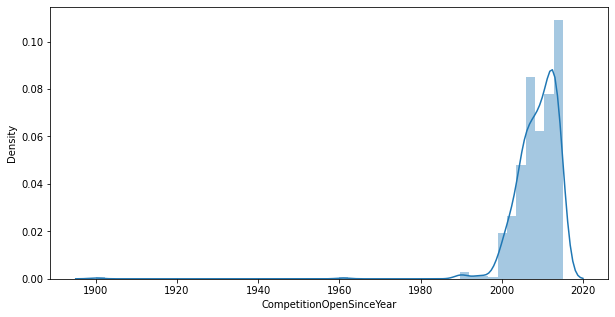

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(store_df['CompetitionOpenSinceYear'])

In [ ]:
from statistics import mode
# By seeing the graph we can say that we can replace the null values with mode for competition open since Year/Month.
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

# same for the competition open since month
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
# Replacing Nan values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].fillna(0) , inplace = True)

# Replacing Nan values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].fillna(0) ,inplace = True)

# Replacing Nan values with 0 in PromoInterval
store_df['PromoInterval'].fillna(store_df['PromoInterval'].fillna(0) ,inplace = True)

In [ ]:
## Now checking Nan values are present or not.
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# Write your code to make your dataset analysis ready.
# Value_counts of StateHoliday Column
rm_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Value_counts of StateHoliday Column
rm_df.value_counts()

Store  DayOfWeek  Date        Sales  Customers  Open  Promo  StateHoliday  SchoolHoliday
1      1          2013-01-07  7176   785        1     1      0             1                1
745    5          2015-06-05  7622   711        1     1      0             0                1
                  2015-03-06  7667   738        1     1      0             0                1
                  2015-03-13  6268   668        1     0      0             0                1
                  2015-03-20  7857   725        1     1      0             0                1
                                                                                           ..
372    7          2013-03-03  0      0          0     0      0             0                1
                  2013-03-10  0      0          0     0      0             0                1
                  2013-03-17  0      0          0     0      0             0                1
                  2013-03-24  0      0          0     0      0   

Let's merge the two given datasets .

In [ ]:
# Merging the two dataset 'Rossmann store dataset' and 'Store dataset'
df=rm_df.merge(store_df,how='inner',on='Store')

In [ ]:
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)
df["Sales"]= df["Sales"].astype(int)
df["Customers"]= df["Customers"].astype(int)

In [ ]:
df['Date']=pd.to_datetime(df['Date'],format="%Y/%m/%d")

In [ ]:
df['PromoInterval']

0                         0
1                         0
2                         0
3                         0
4                         0
                 ...       
1017204    Mar,Jun,Sept,Dec
1017205    Mar,Jun,Sept,Dec
1017206    Mar,Jun,Sept,Dec
1017207    Mar,Jun,Sept,Dec
1017208    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1017209, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
# first view of our df dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270,9,2008,0,0,0,0


In [ ]:
df.isnull().any()

Store                        False
DayOfWeek                    False
Date                         False
Sales                        False
Customers                    False
Open                         False
Promo                        False
StateHoliday                 False
SchoolHoliday                False
StoreType                    False
Assortment                   False
CompetitionDistance          False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2                       False
Promo2SinceWeek              False
Promo2SinceYear              False
PromoInterval                False
dtype: bool

Hence in df data set no null values are there.

In [ ]:
# check for duplicates in df df 
df.duplicated().any()

False

In [ ]:
# check shape of df df
df.shape

(1017209, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univeriate Analysis

#### Chart - 1

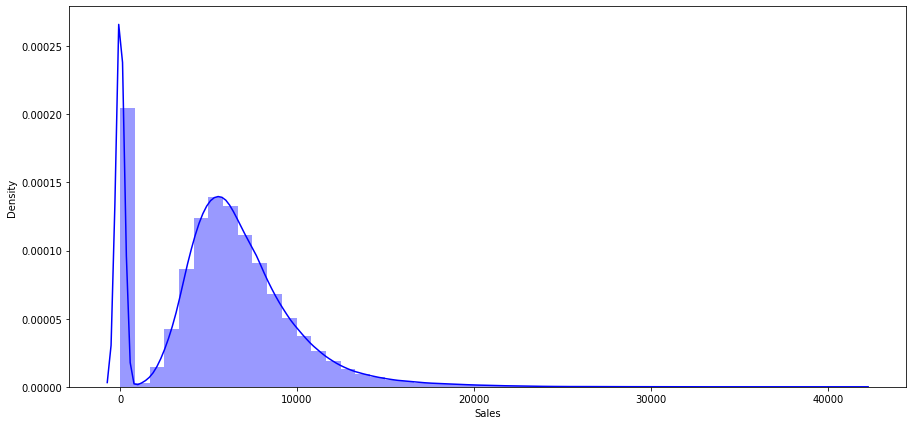

In [ ]:
plt.figure(figsize = (15,7))
sns.distplot (df ['Sales'], color='blue')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

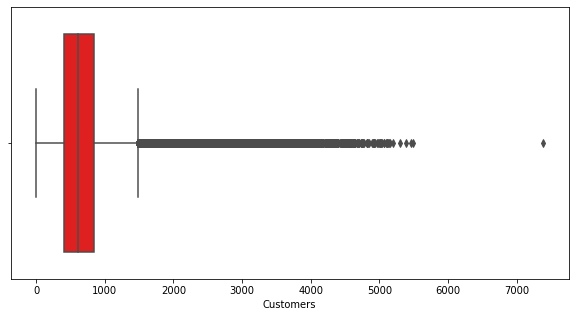

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(df['Customers'], color = 'red' )

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# plt.figure(figsize=(10,7))
# sns.distplot(df[''],color='purple')
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

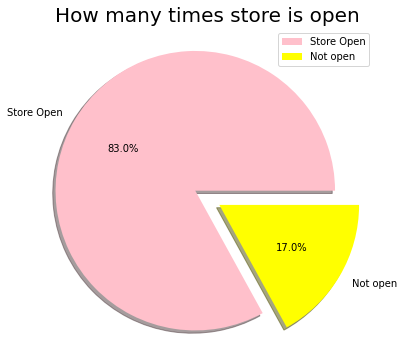

In [ ]:
labels = 'Store Open' , 'Not open'
sizes = df.Open.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("How many times store is open",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

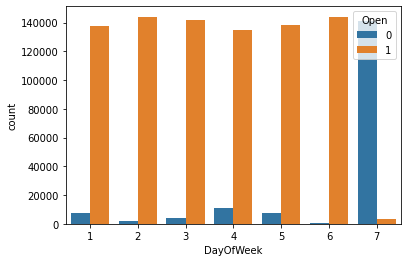

In [ ]:
# Chart - 5 visualization code
sns.countplot(x='DayOfWeek',hue='Open', data = df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

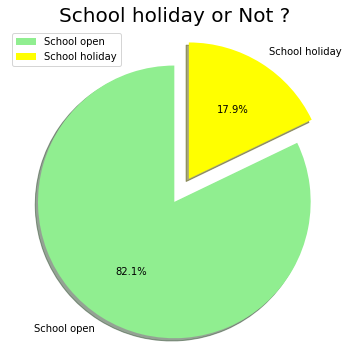

In [ ]:
# Chart - 6 visualization code
labels = 'School open' , 'School holiday'
sizes = df.SchoolHoliday.value_counts()
colors = ['lightgreen', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend( labels, loc="best")
plt.axis('equal')
plt.title("School holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

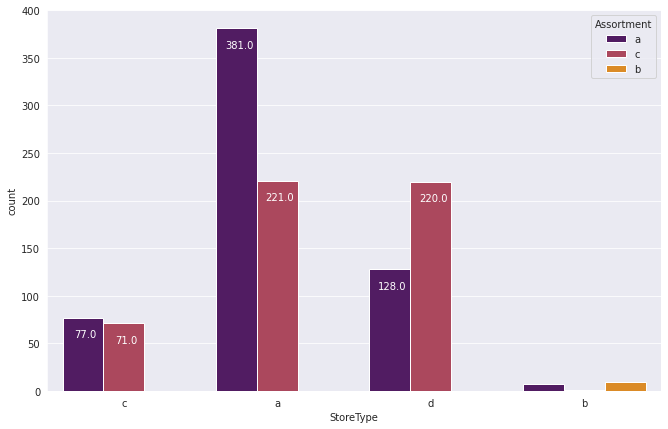

In [ ]:
# Chart - 7 visualization code
#checking stores with their assortment type 
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

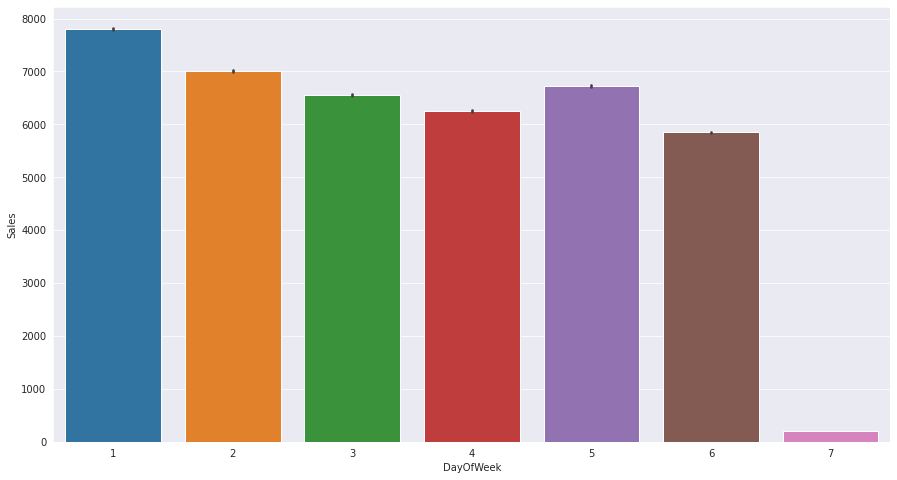

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

Text(0.5, 1.0, 'Boxplot For Sales Values')

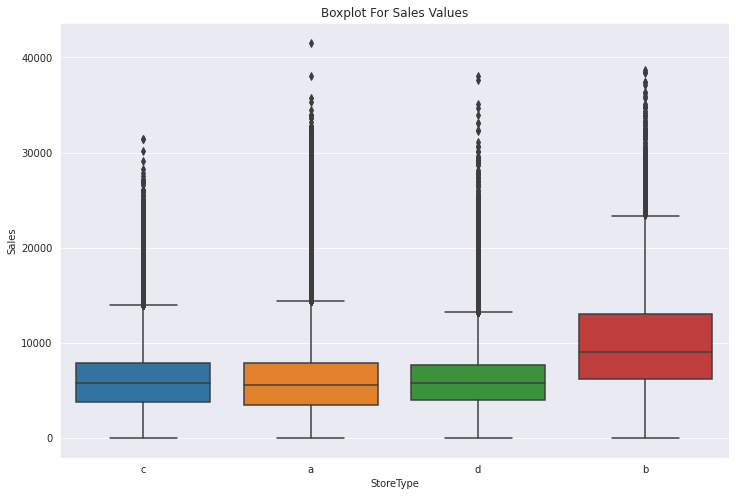

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12,8))
sns.boxplot(x="StoreType", y="Sales", data=df)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales  Values on the basis of Assortment Level')

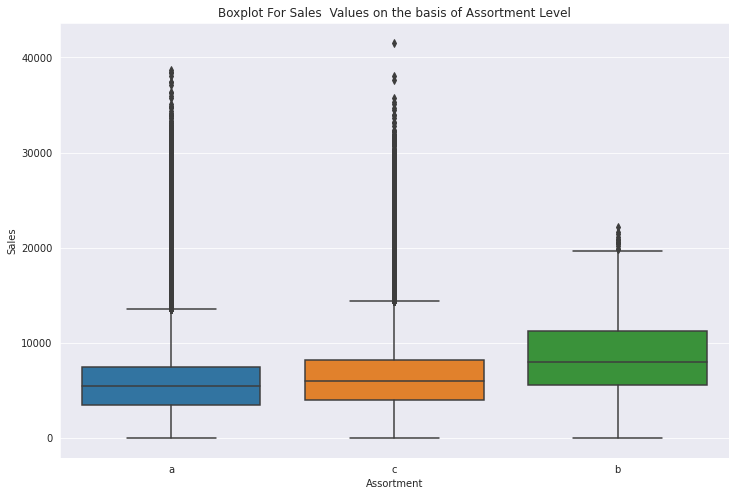

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales  Values on the basis of Assortment Level')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## Bivariate analysis.

### Chart 1

In [ ]:
# Sale vs Date 
from datetime import date as dt
Year=df['Date'].dt.year
Month=df['Date'].dt.month
Day=df['Date'].dt.day

(5000.0, 7000.0)

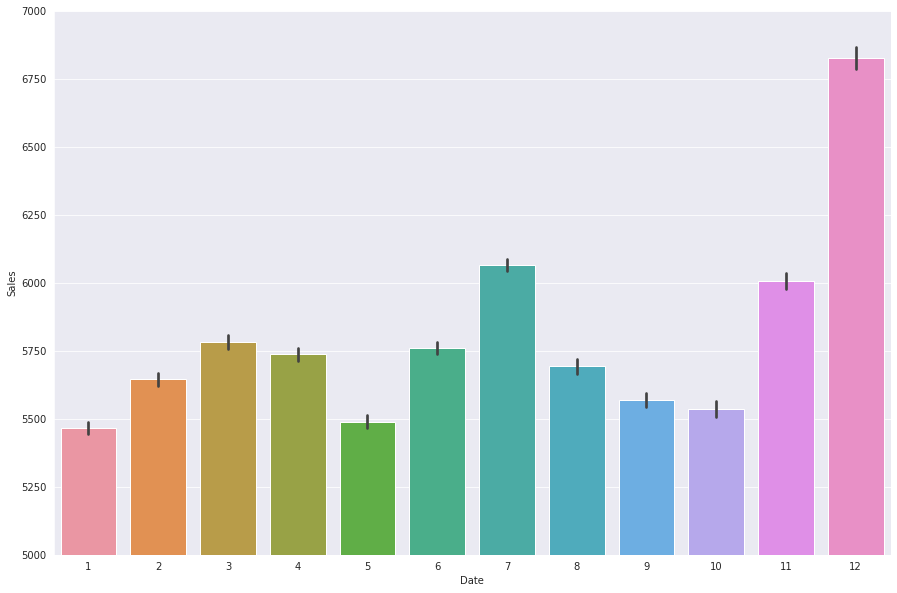

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = Month , y='Sales' , data = df )
plt.ylim(5000,7000)

(3000.0, 8000.0)

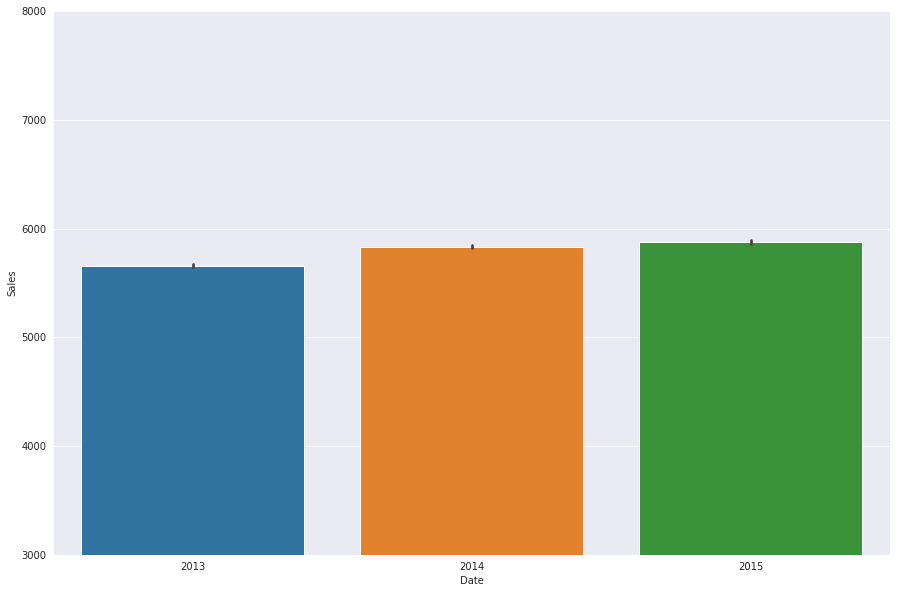

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x= Year , y='Sales' , data = df )
plt.ylim(3000,8000)

(3000.0, 8000.0)

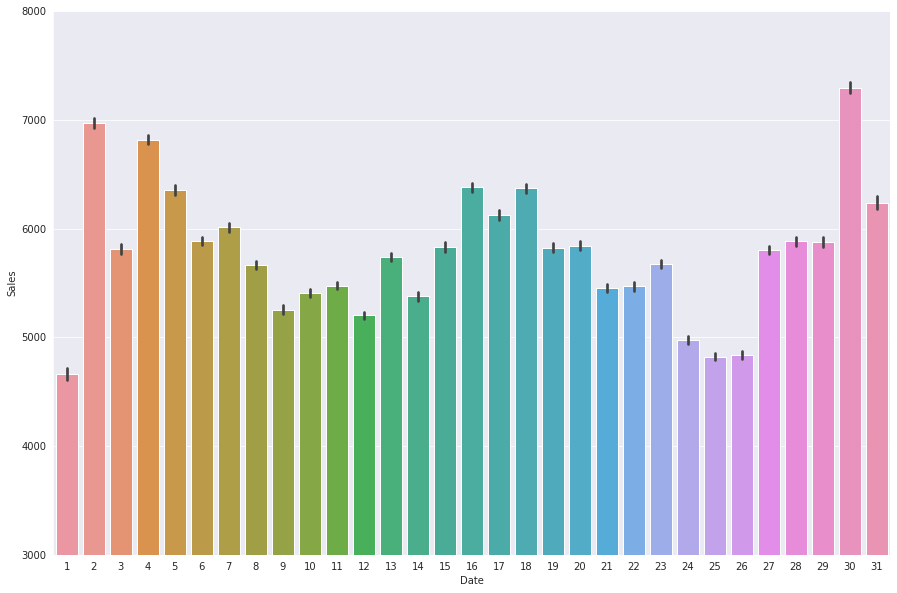

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x= Day , y='Sales' , data = df )
plt.ylim(3000,8000)

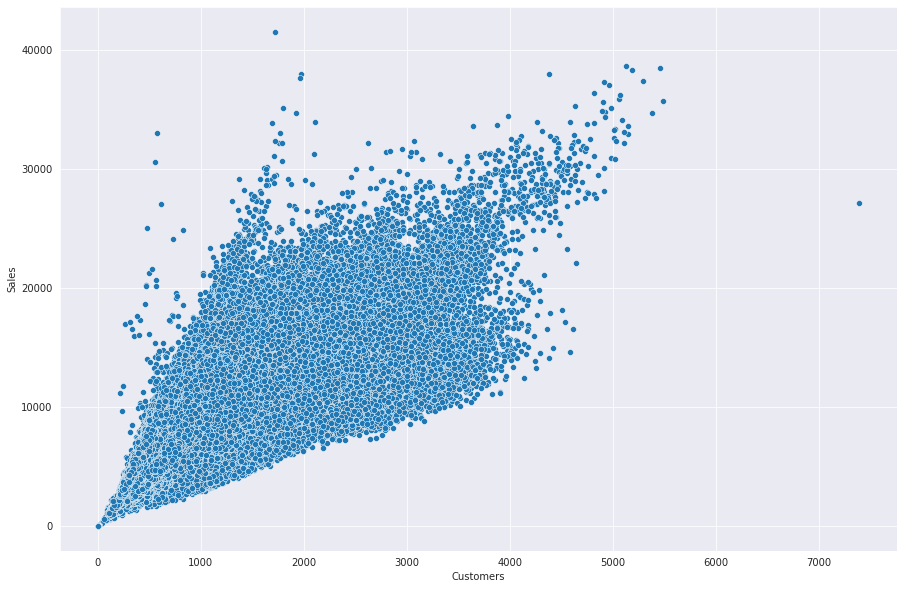

In [ ]:
# Sale Vs Customer
plt.figure(figsize=(15,10))
sns.scatterplot(df['Customers'],df['Sales'])

## Multicolearnity

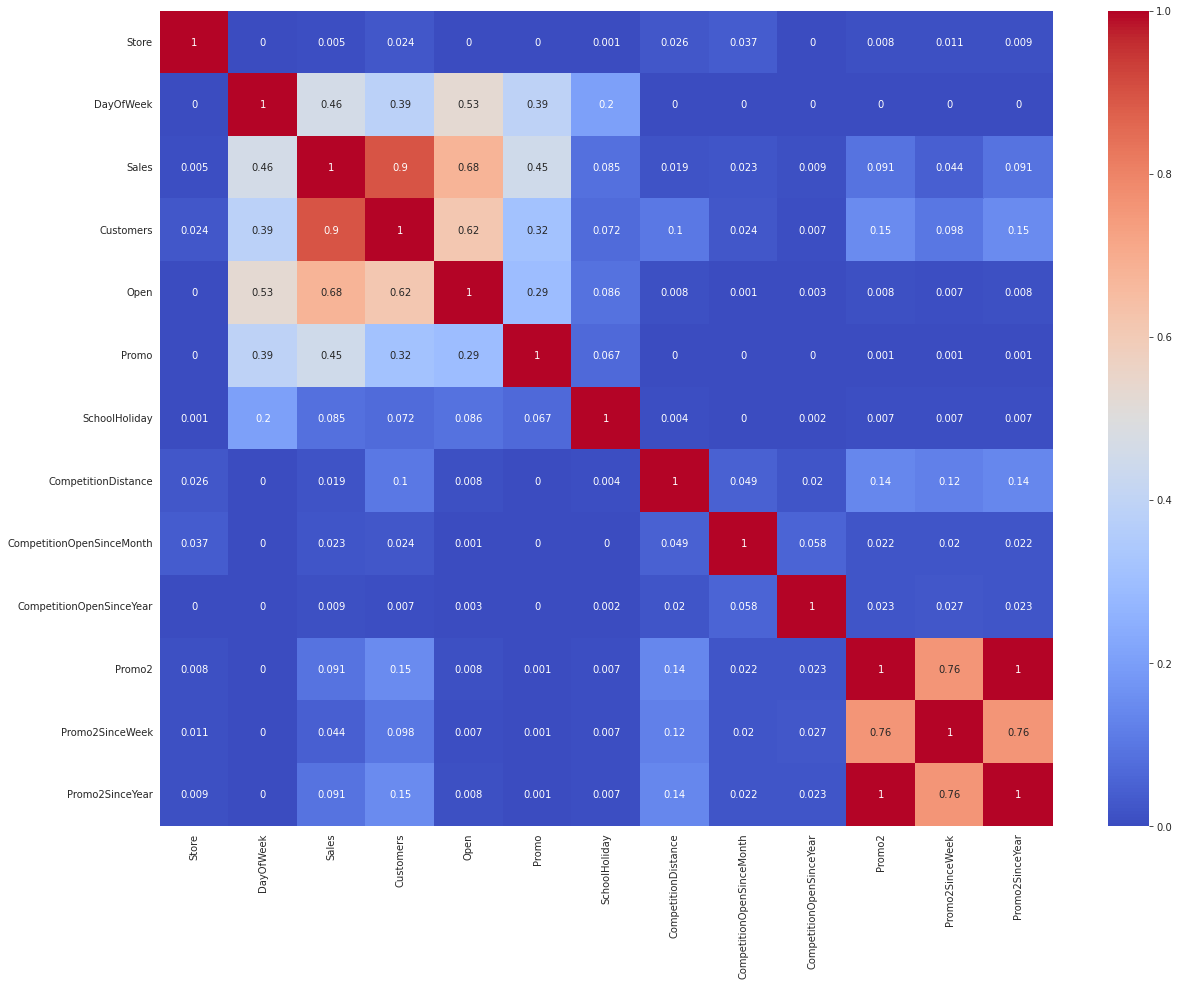

In [ ]:
plt.figure(figsize=(20,15))
correlation = df.corr()
sns.heatmap(abs(round(correlation,3)), annot=True, cmap='coolwarm')
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain df conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

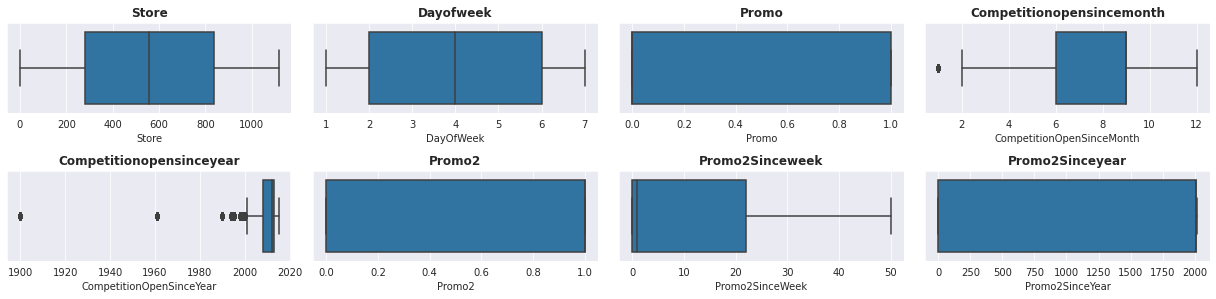

In [ ]:
# Checking outliers for numerical columns

numerical_col=['Store','DayOfWeek','Promo','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear']
# 'SchoolHoliday',,'Open' 

plt.figure(figsize=(17,10))
for n,column in enumerate(numerical_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

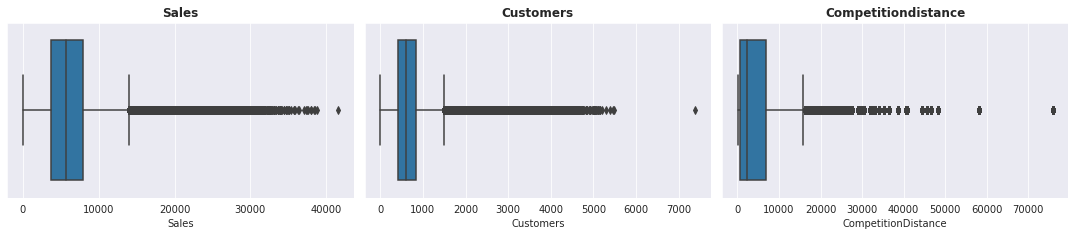

In [ ]:
# Checking outliers for continuous columns

continuous_col=['Sales','Customers','CompetitionDistance']

plt.figure(figsize=(20,15))
for n,column in enumerate(continuous_col):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Here we can observe that there are outliers in various features like:

1. Sales
2. Customers
3. Competition distance
4. CompetitionopensinceYear
5. CompetitionopensinceMonth

In [ ]:
# Let's first make a list of columns of numerical and continuous variables containing outliers
outliners = ['Sales', 'Customers', 'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

In [ ]:
# Knowing the percentage of outliers 

# Let's first make a list of columns of numerical and continuous variables containing outliers
outliners = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales','Customers']

# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in outliners:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27524
Total percentage of outlier is: 2.71 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %




In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Print the outliers
    print("Outliers:", outliers)
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in outliners:
  df[feature]= treat_outliers_iqr(df[feature])

Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in outliners:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %




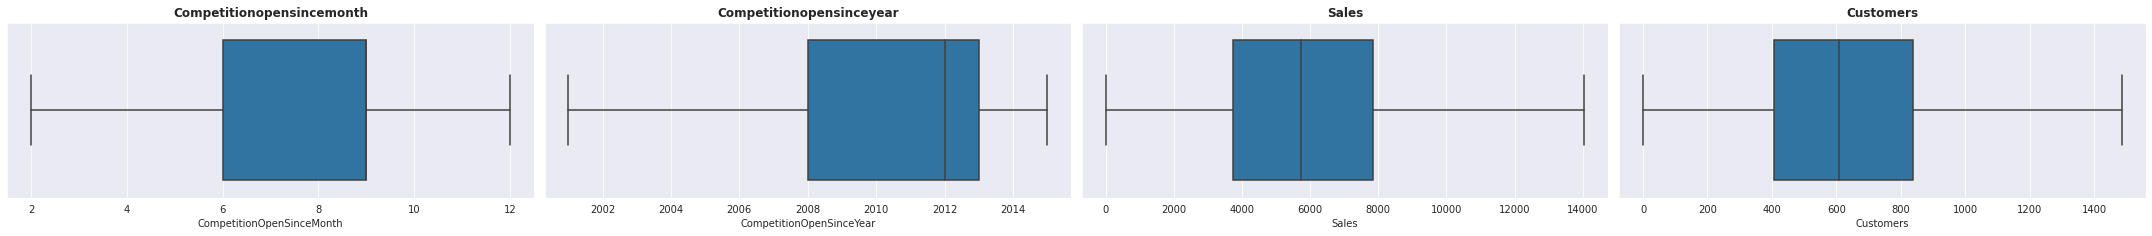

In [ ]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(outliners):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  float64       
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

What all outlier treatment techniques have you used and why did you use those techniques?
we have used the IQR method to do the outlier treatment, because there where too many outliers present, for which log transformation is not an appropriate method

The interquartile range (IQR) is a measure of dispersion that is used to identify and handle outliers in a dataset. It is defined as the difference between the 75th percentile and the 25th percentile of the data, and it is a robust measure of dispersion that is not affected by outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
categorical_col=['StateHoliday','StoreType','Assortment','PromoInterval']

In [ ]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in categorical_col:
  print(f"{unique}: ")
  print(f"\tThe unique values are: {df[unique].unique()}")
  print(f"\tTotal number of unique values are: {df[unique].nunique()}")

StateHoliday: 
	The unique values are: ['0' 'a' 'b' 'c' 0]
	Total number of unique values are: 5
StoreType: 
	The unique values are: ['c' 'a' 'd' 'b']
	Total number of unique values are: 4
Assortment: 
	The unique values are: ['a' 'c' 'b']
	Total number of unique values are: 3
PromoInterval: 
	The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
	Total number of unique values are: 4


In [ ]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0}, inplace=True)

In [ ]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in categorical_col:
  print(f"{unique}: ")
  print(f"\tThe unique values are: {df[unique].unique()}")
  print(f"\tTotal number of unique values are: {df[unique].nunique()}")

StateHoliday: 
	The unique values are: [0 'a' 'b' 'c']
	Total number of unique values are: 4
StoreType: 
	The unique values are: ['c' 'a' 'd' 'b']
	Total number of unique values are: 4
Assortment: 
	The unique values are: ['a' 'c' 'b']
	Total number of unique values are: 3
PromoInterval: 
	The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
	Total number of unique values are: 4


In [ ]:
df_new=pd.get_dummies(df,columns=['StoreType','Assortment','PromoInterval','StateHoliday'],drop_first=True,dtype=int)

# code to see all the features
pd.set_option('display.max_columns', None)

# Let's see first five observations of our dataset
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263.0,555.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,4,2015-07-30,5020.0,546.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,3,2015-07-29,4782.0,523.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,2,2015-07-28,5011.0,560.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,2015-07-27,6102.0,612.0,1,1,1,1270,9.0,2008.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_new.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_a,StateHoliday_b,StateHoliday_c
689300,757,5,2013-08-30,6505.0,502.0,1,1,1,3450,9.0,2013.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
878693,964,2,2013-11-19,9939.0,1342.0,1,1,0,270,9.0,2013.0,1,5,2013,0,0,0,0,0,1,0,0,0,0,0
450894,494,5,2013-04-12,8166.0,1140.0,1,1,0,1260,6.0,2011.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
998006,1094,4,2013-06-06,3185.0,288.0,1,1,0,2380,3.0,2013.0,1,40,2014,0,0,1,0,0,0,1,0,0,0,0
476910,523,5,2013-04-26,7856.0,837.0,1,1,0,50,11.0,2013.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
567339,622,2,2013-01-01,0.0,0.0,0,0,1,2325,9.0,2013.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
119303,131,5,2013-08-23,4212.0,490.0,1,0,1,920,7.0,2015.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
726316,798,5,2015-07-17,7914.0,840.0,1,1,1,9560,4.0,2001.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
686887,755,2,2015-02-10,8112.0,789.0,1,0,0,13130,12.0,2003.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
903105,991,2,2015-03-03,6640.0,548.0,1,1,0,1010,9.0,2013.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  float64       
 4   Customers                       1017209 non-null  float64       
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  int64         
 9   CompetitionOpenSinceMonth       1017209 non-null  float64       
 10  CompetitionOpenSinceYear        1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Extracting date, month and year from Date feature
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
df_new["Week"]= df_new["Date"].dt.week

# #Dropping Date feature from the dataset as we are gaining same information with extracted features
df_new.drop(columns=["Date"],inplace=True, axis=1)


**we have dropped non unique values in df_new(Stateholiday,Promointerval)**

#### 2. Feature Selection

In [ ]:
# deriving 2 new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is not involved in any promotion"
##    Final values are in Months.
df_new["CompetitionDuration"]= (df_new["Year"]-df_new["CompetitionOpenSinceYear"])*12 + (df_new["Month"]-df_new["CompetitionOpenSinceMonth"])
df_new["CompetitionDuration"] = df_new["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
df_new["PromoDuration"]= (df_new["Year"]-df_new["Promo2SinceYear"])*12 + (df_new["Week"]-df_new["Promo2SinceWeek"])*7/30.5
df_new["PromoDuration"] = df_new["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * df["Promo2"]

In [ ]:
# Transform Your data
df_new.Open.value_counts()


1    844392
0    172817
Name: Open, dtype: int64

In [ ]:
df_new = df_new[df_new.Open != 0]

In [ ]:
df_new.Open.value_counts()

1    844392
Name: Open, dtype: int64

In [ ]:
# now open is no more a variable hence we can drop it.
df_new=df_new.drop('Open', axis=1)

In [ ]:
final_df = df_new.drop(["CompetitionOpenSinceMonth","CompetitionOpenSinceYear",'Promo2SinceWeek',"Promo2SinceYear",'Promo2'],axis =1)

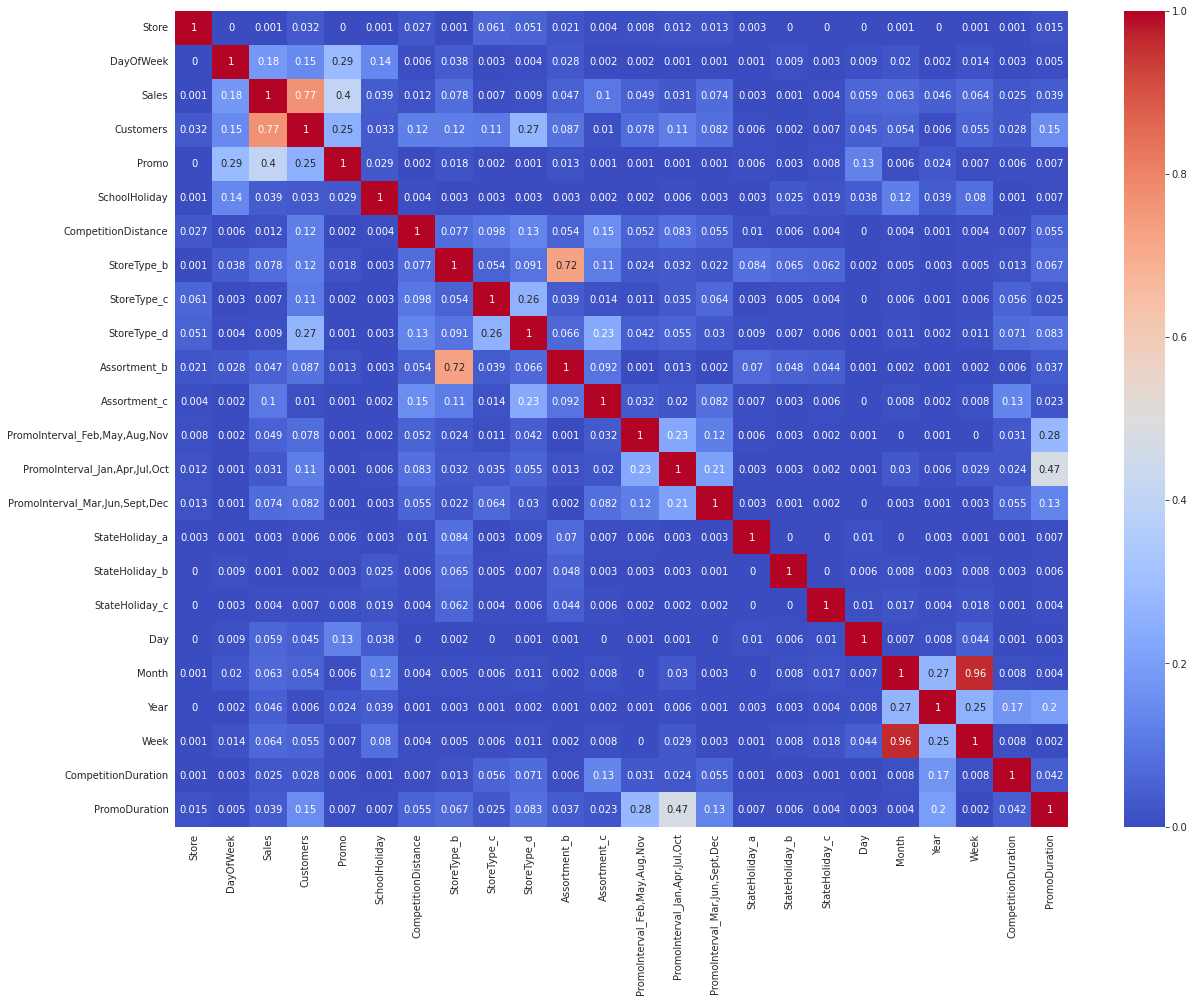

In [ ]:
# DImensionality Reduction (If needed)
plt.figure(figsize=(20,15))
correlation = final_df.corr()
sns.heatmap(abs(round(correlation,3)), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# after drawing heat map we conclude

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           844392 non-null  int64  
 1   DayOfWeek                       844392 non-null  int64  
 2   Sales                           844392 non-null  float64
 3   Customers                       844392 non-null  float64
 4   Promo                           844392 non-null  int64  
 5   SchoolHoliday                   844392 non-null  int64  
 6   CompetitionDistance             844392 non-null  int64  
 7   StoreType_b                     844392 non-null  int64  
 8   StoreType_c                     844392 non-null  int64  
 9   StoreType_d                     844392 non-null  int64  
 10  Assortment_b                    844392 non-null  int64  
 11  Assortment_c                    844392 non-null  int64  
 12  PromoInterval_F

In [ ]:
# calculating the vif by excluding the redundant features("Sales -> Dependent variable" and "Store -> ID")
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store", "Sales"]]])

,variables,VIF
0,DayOfWeek,5.809960
1,Customers,11.055669
2,Promo,2.137142
3,SchoolHoliday,1.309027
4,CompetitionDistance,1.625101
5,StoreType_b,2.196278
6,StoreType_c,1.277605
7,StoreType_d,1.786978
8,Assortment_b,2.123687
9,Assortment_c,2.093996


In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store",'PromoDuration','PromoInterval_Jan,Apr,Jul,Oct','Assortment_b','Month', "Sales"]]])

,variables,VIF
0,DayOfWeek,5.806201
1,Customers,10.755449
2,Promo,2.120311
3,SchoolHoliday,1.275583
4,CompetitionDistance,1.584246
5,StoreType_b,1.077757
6,StoreType_c,1.273675
7,StoreType_d,1.781272
8,Assortment_c,2.089555
9,"PromoInterval_Feb,May,Aug,Nov",1.167218


Day,Year

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store",'Day','StateHoliday_b','PromoDuration','Year','PromoInterval_Jan,Apr,Jul,Oct','Assortment_b','Month', "Sales"]]])

,variables,VIF
0,DayOfWeek,3.988046
1,Customers,6.178937
2,Promo,2.041088
3,SchoolHoliday,1.251254
4,CompetitionDistance,1.530257
5,StoreType_b,1.072978
6,StoreType_c,1.266968
7,StoreType_d,1.644843
8,Assortment_c,2.063123
9,"PromoInterval_Feb,May,Aug,Nov",1.139073


StateHoliday_b,Week

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ["Store",'Week','Day','StateHoliday_b','StateHoliday_b','PromoDuration','Year','PromoInterval_Jan,Apr,Jul,Oct','Assortment_b','Month', "Sales"]]])

,variables,VIF
0,DayOfWeek,3.819689
1,Customers,5.497510
2,Promo,2.038334
3,SchoolHoliday,1.232831
4,CompetitionDistance,1.523381
5,StoreType_b,1.072968
6,StoreType_c,1.266379
7,StoreType_d,1.631797
8,Assortment_c,2.059589
9,"PromoInterval_Feb,May,Aug,Nov",1.135736


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [ ]:
# Creating a variable containg continuous columns of final dataframe
Continuous_col=['Sales','Customers','CompetitionDistance','CompetitionDuration','PromoDuration']

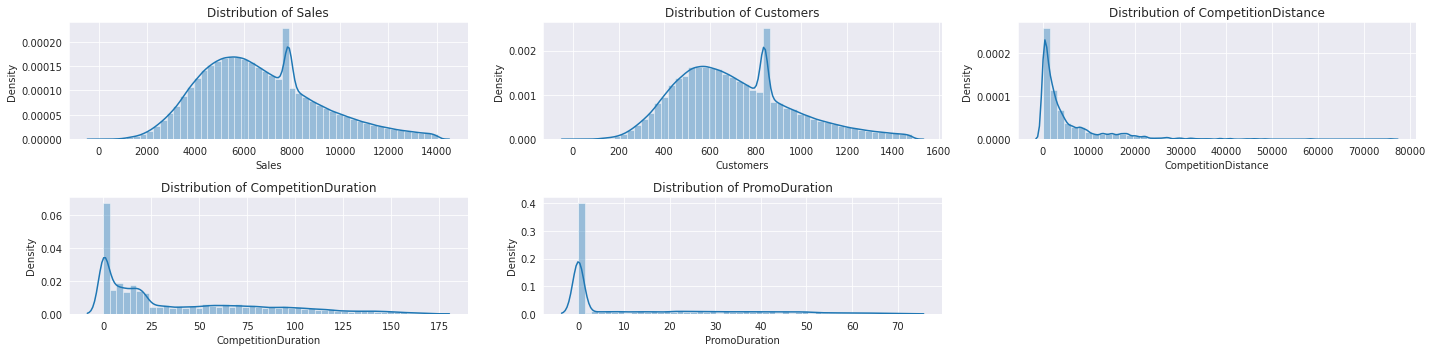

In [ ]:
# Let's view the distribution of continuous columns
plt.figure(figsize=(20,5))
for n,col in enumerate(Continuous_col):
  plt.subplot(2,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

In [ ]:
# Applying transformation on the above considered columns
final_df['Sales']=np.sqrt(final_df['Sales'])
final_df['Customers']=np.sqrt(final_df['Customers'])
final_df['CompetitionDistance']=np.log1p(final_df['CompetitionDistance'])
final_df['PromoDuration']=np.log1p(final_df['PromoDuration'])
final_df['CompetitionDuration']=np.log1p(final_df['CompetitionDuration'])

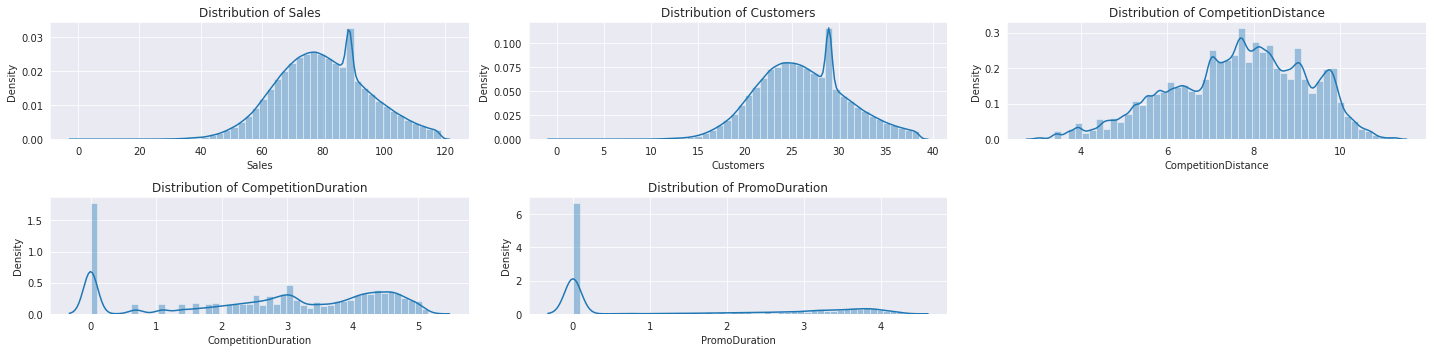

In [ ]:
# Viewing the distribution above of above columns after applying transformation 
plt.figure(figsize=(20,5))
for n,col in enumerate(Continuous_col):
  plt.subplot(2,3,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

The log10() function computes the value of the logarithm of argument x to base 10. The log1p() function computes the value of log(1+x) accurately even for tiny argument x. hence we used it 

In [ ]:
final_df

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_a,StateHoliday_b,StateHoliday_c,Day,Month,Year,Week,CompetitionDuration,PromoDuration
0,1,5,72.546537,23.558438,1,1,7.147559,0,1,0,0,0,0,0,0,0,0,0,31,7,2015,31,4.418841,0.000000
1,1,4,70.851958,23.366643,1,1,7.147559,0,1,0,0,0,0,0,0,0,0,0,30,7,2015,31,4.418841,0.000000
2,1,3,69.152006,22.869193,1,1,7.147559,0,1,0,0,0,0,0,0,0,0,0,29,7,2015,31,4.418841,0.000000
3,1,2,70.788417,23.664319,1,1,7.147559,0,1,0,0,0,0,0,0,0,0,0,28,7,2015,31,4.418841,0.000000
4,1,1,78.115299,24.738634,1,1,7.147559,0,1,0,0,0,0,0,0,0,0,0,27,7,2015,31,4.418841,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,83.096330,21.702534,1,1,8.585039,0,0,1,0,1,0,0,1,0,0,0,7,1,2013,2,0.000000,2.079442
1017204,1115,6,69.072426,18.411953,0,1,8.585039,0,0,1,0,1,0,0,1,0,0,0,5,1,2013,1,0.000000,2.079442
1017205,1115,5,67.379522,18.055470,0,1,8.585039,0,0,1,0,1,0,0,1,0,0,0,4,1,2013,1,0.000000,2.079442
1017206,1115,4,65.551506,17.320508,0,1,8.585039,0,0,1,0,1,0,0,1,0,0,0,3,1,2013,1,0.000000,2.079442


In [ ]:
final_df.describe().columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'Day', 'Month',
       'Year', 'Week', 'CompetitionDuration', 'PromoDuration'],
      dtype='object')

### 6. Data Scaling

In [ ]:
# Scaling your data
# Scaling our final dataframe
scaler = StandardScaler()
scaler = scaler.fit_transform(final_df)

In [ ]:
dependent_variable = ['Sales']

0 DayOfWeek	3.819689
1	Customers	5.497510
2	Promo	2.038334
3	SchoolHoliday	1.232831
4	CompetitionDistance	1.523381
5	StoreType_b	1.072968
6	StoreType_c	1.266379
7	StoreType_d	1.631797
8	Assortment_c	2.059589
9	PromoInterval_Feb,May,Aug,Nov	1.135736
10	PromoInterval_Mar,Jun,Sept,Dec	1.130334
11	StateHoliday_a	1.008299
12	StateHoliday_c	1.004408
13	CompetitionDuration	1.795775

In [ ]:
independent_variables=['DayOfWeek',"Customers","Promo","SchoolHoliday",'CompetitionDistance',"StoreType_b",
                   "StoreType_c",'StoreType_d',"Assortment_c","PromoInterval_Mar,Jun,Sept,Dec",'PromoInterval_Feb,May,Aug,Nov',
                   'StateHoliday_a','StateHoliday_c','CompetitionDuration']

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Assortment_b and storetype_b are highley co related hece we will remove **assortment_b** because it is highley dependent on sale.

Promo_oct and promoOpen Highley dependent to reduce colenearity we will drop **promo_oct** because PromoOpen is highley dependent on sale.

StoreType_a and storetype_d are highley co-related hence we will remove **StoreTye_a** because storeType_d is highley dependent on sale

week of year vs **month**, **Year**

assortment_a vs **assortment_c**

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           844392 non-null  int64  
 1   DayOfWeek                       844392 non-null  int64  
 2   Sales                           844392 non-null  float64
 3   Customers                       844392 non-null  float64
 4   Promo                           844392 non-null  int64  
 5   SchoolHoliday                   844392 non-null  int64  
 6   CompetitionDistance             844392 non-null  float64
 7   StoreType_b                     844392 non-null  int64  
 8   StoreType_c                     844392 non-null  int64  
 9   StoreType_d                     844392 non-null  int64  
 10  Assortment_b                    844392 non-null  int64  
 11  Assortment_c                    844392 non-null  int64  
 12  PromoInterval_F

In [ ]:
X = final_df[independent_variables].values

In [ ]:
y = final_df[dependent_variable].values

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
# X = final_df[independent_variables].apply(zscore)

In [ ]:
# y = final_df[dependent_variable]

In [ ]:
X

array([[ 5.        , 23.55843798,  1.        , ...,  0.        ,
         0.        ,  4.41884061],
       [ 4.        , 23.36664289,  1.        , ...,  0.        ,
         0.        ,  4.41884061],
       [ 3.        , 22.86919325,  1.        , ...,  0.        ,
         0.        ,  4.41884061],
       ...,
       [ 5.        , 18.05547009,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        , 17.32050808,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        , 17.4642492 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### 8. Data Splitting

##### What data splitting ratio have you used and why? 

In [ ]:
print(X.shape)
print(y.shape)

(844392, 14)
(844392, 1)


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(675513, 14)
(168879, 14)


What data splitting ratio have you used and why?
1. training set - 80%
2. test set - 20%

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating object
regressor= StandardScaler()
# Fit and Transform
X = regressor.fit_transform(X)

In [ ]:
np.any(np.isnan(X))
np.all(np.isfinite(X))

True

In [ ]:
np.any(np.isnan(y))
np.all(np.isfinite(y))

True

Answer Here.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

## ML Model - 1 Linear regression

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

# Fit the Algorithm


# Predict on the model
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [ ]:
reg.score(X_train,y_train)

0.7431981738029491

In [ ]:
reg.coef_

array([[-0.0152774 ,  2.58950754,  5.8376482 ,  0.29294536,  0.88871339,
         1.43366225, -0.95045817,  6.25228551,  1.65226271, -0.32559859,
         0.60247545, -1.7720498 ,  2.99477478,  0.16330108]])

In [ ]:
reg.intercept_

array([-0.00436042])

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Calculating the various errors
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)
  print("\n")
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)
  print("\n")
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)
  print("\n")
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)
  print("\n")
  

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating the regression metrics
regression_metrics(y_train,y_train_pred,y_test,y_test_pred)

MAE on train is: 5.6003837356410635
MAE on test is: 5.609855650892506


MSE on train is: 57.745328735532354
MSE on test is: 57.96143723832723


RMSE on train is: 7.59903472393253
RMSE on test is: 7.613240915558054


R2 on train is: 0.7431981738029491
R2 on test is: 0.7418482798631609




In [ ]:
final_df['Sales'].sample(10)

809128     79.284299
699090    100.712462
965529     90.537285
80117      83.558363
12364      82.565126
220206     72.807967
18738      84.136793
749863     76.622451
336846     97.144223
154171     82.794927
Name: Sales, dtype: float64

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

## ML Model - 2 (LASSO)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7418530775692236 0.7431976069935444


In [ ]:
#get the X_train and X-test value
y_train_pred_lasso=lasso.predict(X_train)
y_test_pred_lasso=lasso.predict(X_test)

In [ ]:
regression_metrics(y_train,y_train_pred_lasso,y_test,y_test_pred_lasso)

MAE on train is: 5.600402868643614
MAE on test is: 5.609865640750968


MSE on train is: 57.745456190215556
MSE on test is: 57.960360034818045


RMSE on train is: 7.599043110169566
RMSE on test is: 7.613170169831885


R2 on train is: 0.7431976069935444
R2 on test is: 0.7418530775692236




#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
     

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -57.7498596858841


In [ ]:
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
regression_metrics(y_train,y_train_pred_ridge,y_test,y_test_pred_ridge)

MAE on train is: 5.600504656211162
MAE on test is: 5.609945518773988


MSE on train is: 57.745710524011365
MSE on test is: 57.959588537314495


RMSE on train is: 7.599059844744701
RMSE on test is: 7.613119501053067


R2 on train is: 0.7431964759343807
R2 on test is: 0.741856513705681




##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

## ML Model - 3 (**DecisionTreeRegression**)

In [ ]:
# ML Model - 3 Implementation

# Visualizing evaluation Metric Score chart
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline
     
# Fit the Algorithm

# Predict on the model

In [ ]:
tree_regressor = DecisionTreeRegressor(max_depth=5)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y_train_pred_DT = tree_regressor.predict(X_train)
y_train_pred_DT

array([56.04920042, 93.6712787 , 93.6712787 , ..., 78.26581739,
       93.6712787 , 86.14920539])

In [ ]:
y_test_pred_DT = tree_regressor.predict(X_test)
y_test_pred_DT

array([86.74650204, 70.30014195, 95.66609323, ..., 84.27946595,
       84.27946595, 79.4389872 ])

In [ ]:
regression_metrics(y_train,y_train_pred_DT,y_test,y_test_pred_DT)

MAE on train is: 5.810960781029309
MAE on test is: 5.823794371906053


MSE on train is: 54.23496550723189
MSE on test is: 54.46412046312897


RMSE on train is: 7.364439252735533
RMSE on test is: 7.379981061163299


R2 on train is: 0.7588092666373351
R2 on test is: 0.7574248146145085




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

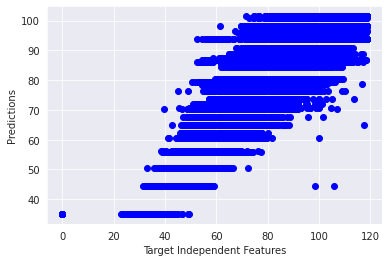

In [ ]:
# Visualizing evaluation Metric Score chart

predictions = tree_regressor.predict(X_test)

# Calculate the evaluation score using a metric of your choice
# For example, let's use mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)

# Plot the predictions against the ground truth labels
plt.plot(y_test, predictions, "bo")
plt.xlabel("Target Independent Features")
plt.ylabel("Predictions")

# Show the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Fit the Algorithm
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the model
model = DecisionTreeRegressor()

# Fit the Algorithm

# Predict on the model

In [ ]:

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:

y_train_pred_DT_cv = grid_search.predict(X_train)
y_train_pred_DT_cv
     
y_test_pred_DT_cv = grid_search.predict(X_test)
y_test_pred_DT_cv

array([84.80804024, 74.2522186 , 94.7283668 , ..., 89.96372865,
       85.0379281 , 77.34773432])

In [ ]:
regression_metrics(y_train,y_train_pred_DT_cv,y_test,y_test_pred_DT_cv)

MAE on train is: 4.771574418567849
MAE on test is: 4.81260011455178


MSE on train is: 38.11073363694018
MSE on test is: 38.746541772829296


RMSE on train is: 6.173389153207514
RMSE on test is: 6.224672021305966


R2 on train is: 0.8305160571429313
R2 on test is: 0.8274285993481958




## **ML Model 4 (XgBoost Regression)**

In [ ]:
import xgboost as xg

In [ ]:
xgb_reg = xg.XGBRegressor()

In [ ]:
# fitting the model
xgb_reg.fit(X_train,y_train)

[10:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,xgb_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,xgb_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8133
The r2 score for training is 0.8144


In [ ]:
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)


In [ ]:
regression_metrics(y_train,y_train_pred_xgb,y_test,y_test_pred_xgb)

MAE on train is: 5.0381264066676765
MAE on test is: 5.046906302778659


MSE on train is: 41.73104975768169
MSE on test is: 41.9141509487038


RMSE on train is: 6.459957411444885
RMSE on test is: 6.4741139122434195


R2 on train is: 0.8144159878979367
R2 on test is: 0.8133205337715798




## **MODEL 5 (LIGHT GBM)**

In [ ]:
# importing essential library
import lightgbm as lgb
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier

In [ ]:
# creating an object for model
model = LGBMClassifier().fit(X_train , y_train)

ValueError: ignored

In [ ]:
# Predicting the Target variable
y_train_pred_lgb = model.predict(X_train)
y_test_pred_lgb = model.predict(X_test)

### **Explain the ML Model used and it's performance using Evaluation metric Score Chart**

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your df prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***